In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# 1. Membaca dataset
df = pd.read_csv(r"C:\Users\OPTION\Downloads\Python DA\[BEUM] Project 2_Amazon Prime Show's Analysis Report 2021\amazon_prime_titles.csv")
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...
...,...,...,...,...,...,...,...,...,...,...,...,...
9663,s9664,Movie,Pride Of The Bowery,Joseph H. Lewis,"Leo Gorcey, Bobby Jordan",NaN,NaN,1940,7+,60 min,Comedy,New York City street principles get an East Si...
9664,s9665,TV Show,Planet Patrol,NaN,"DICK VOSBURGH, RONNIE STEVENS, LIBBY MORRIS, M...",NaN,NaN,2018,13+,4 Seasons,TV Shows,"This is Earth, 2100AD - and these are the adve..."
9665,s9666,Movie,Outpost,Steve Barker,"Ray Stevenson, Julian Wadham, Richard Brake, M...",NaN,NaN,2008,R,90 min,Action,"In war-torn Eastern Europe, a world-weary grou..."
9666,s9667,TV Show,Maradona: Blessed Dream,NaN,"Esteban Recagno, Ezequiel Stremiz, Luciano Vit...",NaN,NaN,2021,TV-MA,1 Season,"Drama, Sports","The series tells the story of Diego Maradona, ..."


In [3]:
# Menampilkan informasi dasar
print("Dimensi awal dataset:", df.shape)

Dimensi awal dataset: (9668, 12)


In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7586 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB


,release_year
count,9668.000000
mean,2008.341849
std,18.922482
min,1920.000000
25%,2007.000000
50%,2016.000000
75%,2019.000000
max,2021.000000


In [6]:
# Simpan salinan asli untuk perbandingan
df_original = df.copy()

# Tampilkan informasi awal
print("Shape Data Asli:", df.shape)
print(df.info())

Shape Data Asli: (9668, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7586 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB
None


In [7]:
# 1. Deteksi dan hapus data duplikat
duplicates = df.duplicated()
print("Jumlah data duplikat:", duplicates.sum())
df = df.drop_duplicates()

Jumlah data duplikat: 0


In [8]:
# 2. Deteksi missing values
missing_counts = df.isnull().sum()
print("Missing Values per kolom:\n", missing_counts)
# Hapus baris yang memiliki nilai kosong
df = df.dropna()

Missing Values per kolom:
 show_id            0
type               0
title              0
director        2082
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
description        0
dtype: int64


In [9]:
# 3. Deteksi outlier pada kolom numerik (misalnya release_year)
# Menggunakan metode IQR
Q1 = df['release_year'].quantile(0.25)
Q3 = df['release_year'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [10]:
# Sebelum menghapus, lihat jumlah outlier
outliers = df[(df['release_year'] < lower_bound) | (df['release_year'] > upper_bound)]
print("Jumlah outlier pada release_year:", outliers.shape[0])

# Hapus baris outlier
df_clean = df[(df['release_year'] >= lower_bound) & (df['release_year'] <= upper_bound)]

Jumlah outlier pada release_year: 0


Text(0.5, 1.0, 'Histogram release_year (Sebelum Cleaning)')

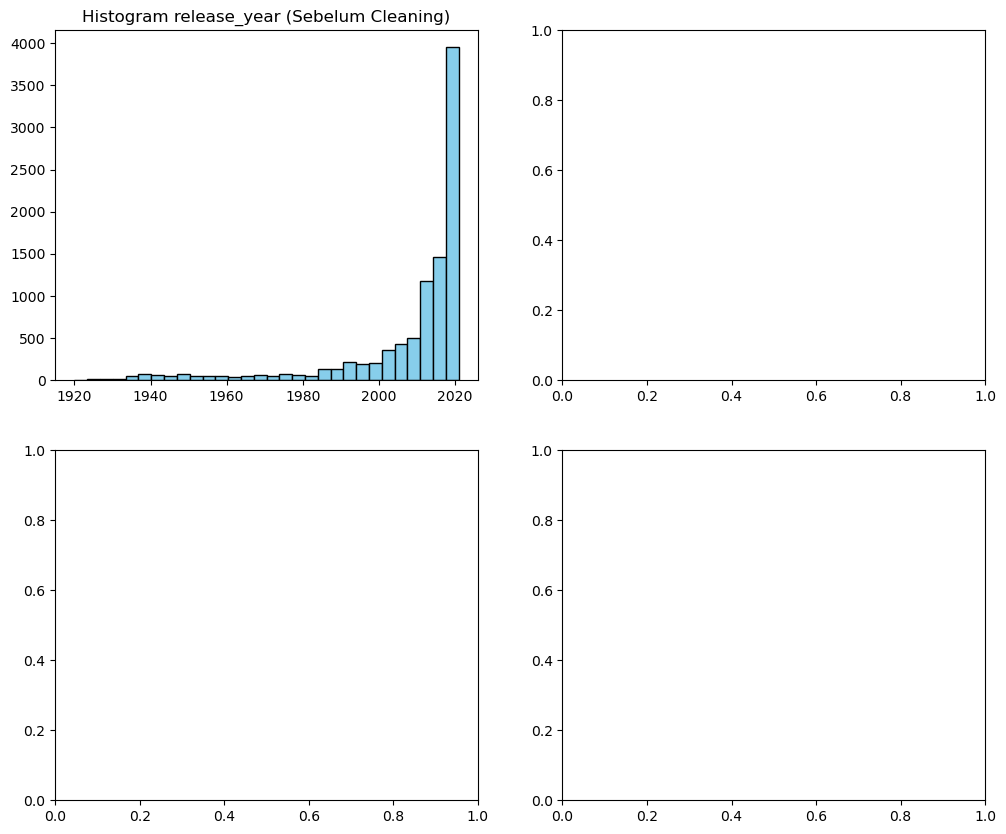

In [11]:
# Visualisasi histogram dan box plot dari kolom release_year (sebelum dan sesudah cleaning)
fig, axes = plt.subplots(2, 2, figsize=(12,10))

# Histogram sebelum cleaning
axes[0,0].hist(df_original['release_year'], bins=30, color='skyblue', edgecolor='black')
axes[0,0].set_title("Histogram release_year (Sebelum Cleaning)")

In [12]:
# Boxplot sebelum cleaning
axes[0,1].boxplot(df_original['release_year'], vert=False)
axes[0,1].set_title("Boxplot release_year (Sebelum Cleaning)")

# Histogram sesudah cleaning
axes[1,0].hist(df_clean['release_year'], bins=30, color='lightgreen', edgecolor='black')
axes[1,0].set_title("Histogram release_year (Sesudah Cleaning)")

Text(0.5, 1.0, 'Histogram release_year (Sesudah Cleaning)')

In [13]:
# Boxplot sesudah cleaning
axes[1,1].boxplot(df_clean['release_year'], vert=False)
axes[1,1].set_title("Boxplot release_year (Sesudah Cleaning)")

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [14]:
# Perbandingan jumlah data sebelum dan sesudah cleaning
print("Jumlah data asli:", df_original.shape[0])
print("Jumlah data setelah cleaning:", df_clean.shape[0])

Jumlah data asli: 9668
Jumlah data setelah cleaning: 1


In [15]:
# Simpan dataset cleaned
df_clean.to_csv("amazon_prime_titles_cleaned.csv", index=False)

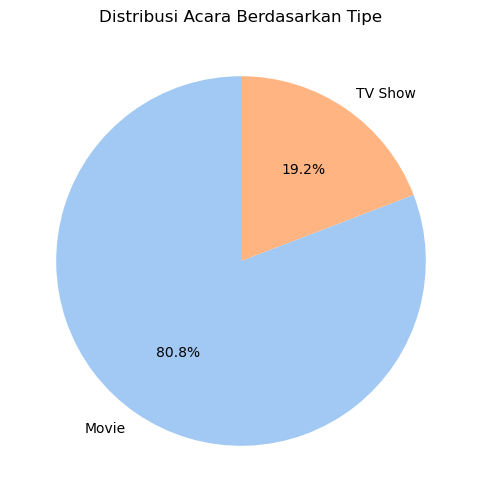

In [23]:
plt.figure(figsize=(6,6))
type_counts = df['type'].value_counts()
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title("Distribusi Acara Berdasarkan Tipe")
plt.show()

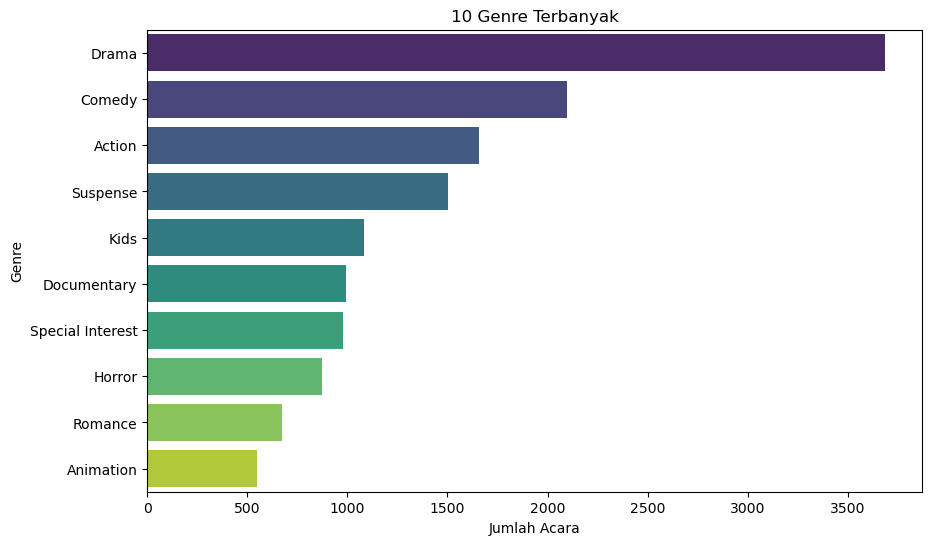

In [24]:
# Split genre dan hitung frekuensi
genres = df['listed_in'].str.split(',', expand=True).stack().str.strip()
top_genres = genres.value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_genres.values, y=top_genres.index, palette="viridis")
plt.xlabel("Jumlah Acara")
plt.ylabel("Genre")
plt.title("10 Genre Terbanyak")
plt.show()

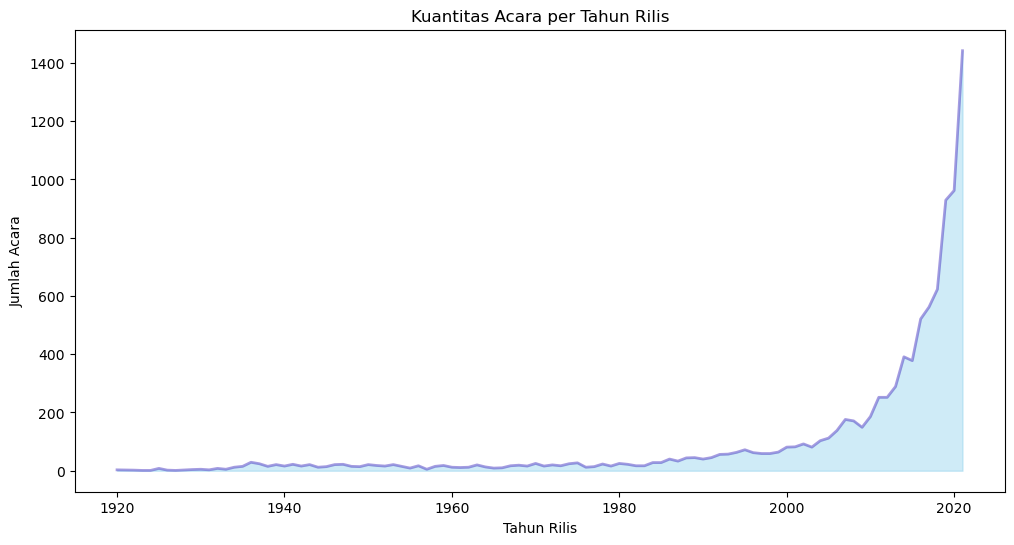

In [25]:
# Hitung jumlah acara per tahun
year_counts = df['release_year'].value_counts().sort_index()

plt.figure(figsize=(12,6))
plt.fill_between(year_counts.index, year_counts.values, color='skyblue', alpha=0.4)
plt.plot(year_counts.index, year_counts.values, color='Slateblue', alpha=0.6, linewidth=2)
plt.xlabel("Tahun Rilis")
plt.ylabel("Jumlah Acara")
plt.title("Kuantitas Acara per Tahun Rilis")
plt.show()

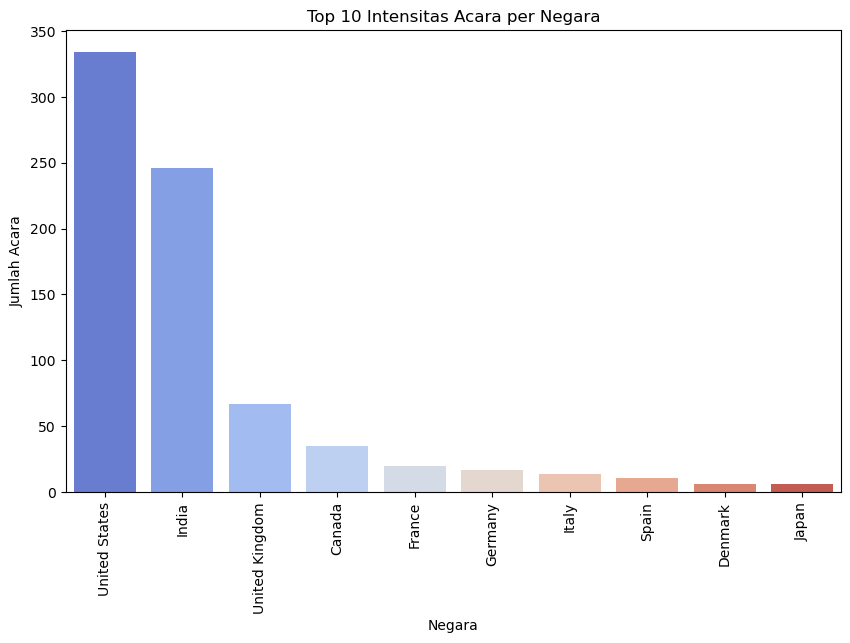

In [27]:
# Pisahkan negara dan hitung frekuensi
countries = df['country'].dropna().str.split(',', expand=True).stack().str.strip()
top_countries = countries.value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.index, y=top_countries.values, palette="coolwarm")
plt.xlabel("Negara")
plt.ylabel("Jumlah Acara")
plt.title("Top 10 Intensitas Acara per Negara")
plt.xticks(rotation=90)
plt.show()

In [20]:
# # Simpan sebagai app_dashboard.py
# import streamlit as st
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Baca dataset cleaned
# df = pd.read_csv("amazon_prime_titles_cleaned.csv")

# st.title("Dashboard Analisis Amazon Prime Titles")

# st.header("1. Distribusi Acara Berdasarkan Tipe")
# fig1, ax1 = plt.subplots()
# type_counts = df['type'].value_counts()
# ax1.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
# ax1.set_title("Distribusi Acara Berdasarkan Tipe")
# st.pyplot(fig1)

# st.header("2. 10 Genre Terbanyak")
# genres = df['listed_in'].str.split(',', expand=True).stack().str.strip()
# top_genres = genres.value_counts().head(10)
# fig2, ax2 = plt.subplots()
# sns.barplot(x=top_genres.values, y=top_genres.index, palette="viridis", ax=ax2)
# ax2.set_xlabel("Jumlah Acara")
# ax2.set_ylabel("Genre")
# ax2.set_title("10 Genre Terbanyak")
# st.pyplot(fig2)

# st.header("3. Kuantitas Acara per Tahun Rilis")
# year_counts = df['release_year'].value_counts().sort_index()
# fig3, ax3 = plt.subplots(figsize=(12,6))
# ax3.fill_between(year_counts.index, year_counts.values, color='skyblue', alpha=0.4)
# ax3.plot(year_counts.index, year_counts.values, color='Slateblue', alpha=0.6, linewidth=2)
# ax3.set_xlabel("Tahun Rilis")
# ax3.set_ylabel("Jumlah Acara")
# ax3.set_title("Kuantitas Acara per Tahun Rilis")
# st.pyplot(fig3)

# st.header("4. Top 10 Intensitas Acara per Negara")
# countries = df['country'].dropna().str.split(',', expand=True).stack().str.strip()
# top_countries = countries.value_counts().head(10)
# fig4, ax4 = plt.subplots(figsize=(10,6))
# sns.barplot(x=top_countries.index, y=top_countries.values, palette="coolwarm", ax=ax4)
# ax4.set_xlabel("Negara")
# ax4.set_ylabel("Jumlah Acara")
# ax4.set_title("Top 10 Intensitas Acara per Negara")
# plt.xticks(rotation=45)
# st.pyplot(fig4)
